In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import xml.etree.ElementTree as ET 
import numpy as np
import sys
from getBoundingBoxes import *
from corner_detector import *
from getBoxFeatures import *
from anms import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


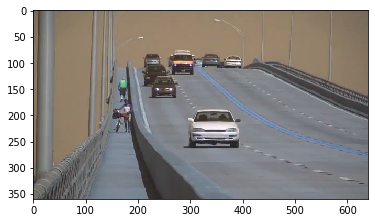

In [39]:
plt.imshow(f)

/home/nic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


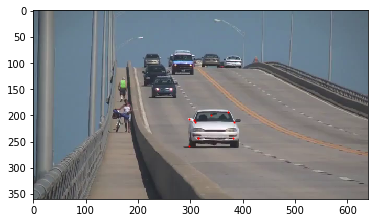

In [41]:
f = cv2.imread('first.png')
boxes = getBoundingBoxes()
for box in boxes:
    cimg = f[box[1]:box[3],box[0]:box[2]]
    gray = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
    # res = corner_detector(gray)
    # x, y, rmax = anms(res,10)
    x,y=getBoxFeatures(gray,box)
    # print(x)
    # print(y)
    plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))
    fig = plt.gcf()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x,y,c='r',s=1,label='ANMS')


